## PHASE_1 PROJECT

### Project Information

STUDENT NAME

   - Susan Warigia
 
STUDENT PACE

   - Data Science Fulltime
 
SCHEDULED PROJECT REVIEW DATE

   - 6/03/2023 - 12/03/2023

INSTRUCTOR NAME

   - William, Nikita & Lucille



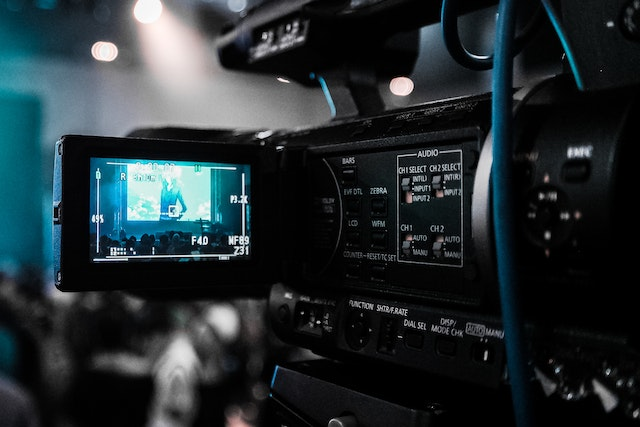

## Business Problem

Microsoft wants to get into Film making and they've decided to create a new movie studio.They don’t know anything about creating movies. Given the data, explore what types of films are currently doing the best at the box office.Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Data Used

- Box Office Mojo
- IMDB Data
- The Movie Database

## Problem Solving Plan

- Data Cleaning
- Data Analysis and Data Visualisation
- Summary

## Importing of Libraries

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#to avoid exponential data
pd.options.display.float_format = '{:.2f}'.format
#importing warnings filter
import warnings
warnings.filterwarnings('ignore')

## DATA CLEANING

DATAFRAME ONE(df1)

In [2]:
# Import csv file in pandas
df1=pd.read_csv ('unzipped/bom.movie_gross.csv')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [3]:
#reading into the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#Generate descriptive statistics for our data
df1.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


In [5]:
#check the sum of all missing values per column
df1.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
#filling the NAN with 0
df1['foreign_gross']=df1['foreign_gross'].fillna(0)

In [7]:
#confirming the data has changed
df1.foreign_gross

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [8]:
#changing data type
df1['foreign_gross']=df1['foreign_gross'].str.replace(',','').astype('float')

In [9]:
#confirming the data is changed by using info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [10]:
#calculating the measures of central tendancies
print(df1['foreign_gross'].median())
print(df1['foreign_gross'].mean())
print(df1['foreign_gross'].mode())

18700000.0
74872810.15046637
0   1200000.00
dtype: float64


In [11]:
#defining domestic_gross median 

median= df1['domestic_gross'].median()
print(median)

#defining foreign_gross median

median1= df1['foreign_gross'].median()
print(median1)

1400000.0
18700000.0


In [12]:
#checking for measures of central tendency
print(df1['domestic_gross'].median())
print(df1['domestic_gross'].mean())
print(df1['domestic_gross'].mode())

1400000.0
28745845.06698422
0   1100000.00
dtype: float64


In [13]:
#fill the domestic_gross missing values with the median

df1['domestic_gross']=df1['domestic_gross'].fillna(median)
print(df1['domestic_gross'])

#fill the 'foreign_gross' missing values the median1 
df1['foreign_gross']=df1['foreign_gross'].fillna(median1)
print(df1['foreign_gross'])


0      415000000.00
1      334200000.00
2      296000000.00
3      292600000.00
4      238700000.00
           ...     
3382        6200.00
3383        4800.00
3384        2500.00
3385        2400.00
3386        1700.00
Name: domestic_gross, Length: 3387, dtype: float64
0      652000000.00
1      691300000.00
2      664300000.00
3      535700000.00
4      513900000.00
           ...     
3382    18700000.00
3383    18700000.00
3384    18700000.00
3385    18700000.00
3386    18700000.00
Name: foreign_gross, Length: 3387, dtype: float64


In [14]:
#drop the studio missing values
df1=df1.dropna(subset =['studio'])

In [15]:
#confirming the data doesn't have any missing values
df1.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

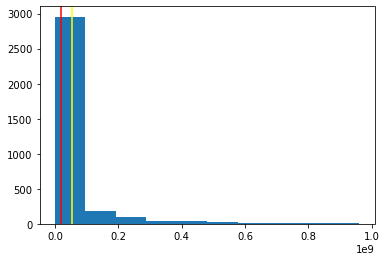

In [16]:
#checking how the data is affected by the mean,median
Bom_foreign_gross= df1['foreign_gross']
plt.hist(Bom_foreign_gross);
plt.axvline(df1['foreign_gross'].median(),color='Red')
plt.axvline(df1['foreign_gross'].mean(),color='Yellow')

In [17]:
#filling the missing values for foreign_gross with the median
df1['foreign_gross']=df1['foreign_gross'].fillna(df1['foreign_gross'].median())
df1['foreign_gross']

0      652000000.00
1      691300000.00
2      664300000.00
3      535700000.00
4      513900000.00
           ...     
3382    18700000.00
3383    18700000.00
3384    18700000.00
3385    18700000.00
3386    18700000.00
Name: foreign_gross, Length: 3382, dtype: float64

In [18]:
#confirming the data has no missing values at all
df1.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
#describing the data to know which variables to work with; float or integer
df1.describe()

,domestic_gross,foreign_gross,year
count,3382.00,3382.00,3382.00
mean,28561064.16,52516148.51,2013.96
std,66791614.60,110109809.04,2.48
min,100.00,600.00,2010.00
25%,123000.00,11700000.00,2012.00
50%,1400000.00,18700000.00,2014.00
75%,27675000.00,29175000.00,2016.00
max,936700000.00,960500000.00,2018.00


In [20]:
#check for any duplicates, False = no duplicates while True= Duplicates
df1.duplicated().value_counts()

False    3382
dtype: int64

In [21]:
#checking for extraneous values to make sure there is no more missing data or unknown characters 
for col in df1.columns:
    print(col,'\n', df1[col].value_counts(normalize=True),'\n\n')

title 
 Bluebeard                                                            0.00
Corpo Celeste                                                        0.00
My Afternoons with Margueritte                                       0.00
I Saw the Devil                                                      0.00
Road to Nowhere                                                      0.00
                                                                     ... 
How Victor 'The Garlic' Took Alexey 'The Stud' to the Nursing Home   0.00
The Monk                                                             0.00
The Ledge                                                            0.00
Inherent Vice                                                        0.00
Tyler Perry's A Madea Christmas                                      0.00
Name: title, Length: 3381, dtype: float64 


studio 
 IFC      0.05
Uni.     0.04
WB       0.04
Magn.    0.04
Fox      0.04
         ... 
Viv.     0.00
IW       0.00
Zee      0.0

In [22]:
#Checking out for outliers for the foreign_gross
#get the 1st and the 3rd quantile
q1=df1['foreign_gross'].quantile(0.25)
q3=df1['foreign_gross'].quantile(0.75)
print(q1)
print(q3)

# Calculate Interquantile Range(IQR)
IQR=q3-q1
print(IQR)

#The Outlier
Outlier=(df1['foreign_gross']<(q1-1.5*IQR))|(df1['foreign_gross']>(q3+1.5*IQR))
Outlier.value_counts()

11700000.0
29175000.0
17475000.0


False    2765
True      617
Name: foreign_gross, dtype: int64

In [23]:
#Checking out for outliers for the domestic_gross
#get the 1st and the 3rd quantile
q1=df1['domestic_gross'].quantile(0.25)
q3=df1['domestic_gross'].quantile(0.75)
print(q1)
print(q3)

# Calculate Interquantile Range(IQR)
IQR=q3-q1
print(IQR)

#The Outlier
Outlier=(df1['domestic_gross']<(q1-1.5*IQR))|(df1['domestic_gross']>(q3+1.5*IQR))
Outlier.value_counts()

123000.0
27675000.0
27552000.0


False    2974
True      408
Name: domestic_gross, dtype: int64

## Working with the second DataFrame (df2)

In [24]:
#import dataframe 2 in pandas library
df2= pd.read_csv('unzipped/tmdb.movies.csv')
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


In [25]:
#checking for any missing values
df2.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [26]:
#checking for duplicates
df2.duplicated().value_counts()

False    26517
dtype: int64

In [27]:
#checking for any extraneous values
for col in df2.columns:
    print(col,'\n', df2[col].value_counts(normalize=True),'\n\n')
    

Unnamed: 0 
 2047    0.00
5448    0.00
3371    0.00
13612   0.00
15661   0.00
        ... 
12979   0.00
2740    0.00
693     0.00
6838    0.00
0       0.00
Name: Unnamed: 0, Length: 26517, dtype: float64 


genre_ids 
 [99]                        0.14
[]                          0.09
[18]                        0.09
[35]                        0.06
[27]                        0.04
                            ... 
[35, 99, 28]                0.00
[10770, 878, 28, 27]        0.00
[12, 28, 18, 53]            0.00
[53, 80, 18, 10749, 9648]   0.00
[12, 37, 28, 10749, 18]     0.00
Name: genre_ids, Length: 2477, dtype: float64 


id 
 292086   0.00
463839   0.00
11976    0.00
391872   0.00
416572   0.00
         ... 
356987   0.00
350846   0.00
479871   0.00
500353   0.00
524288   0.00
Name: id, Length: 25497, dtype: float64 


original_language 
 en   0.88
fr   0.02
es   0.02
ru   0.01
ja   0.01
     ... 
ha   0.00
ps   0.00
cr   0.00
sl   0.00
ky   0.00
Name: original_language, Length: 76, 

In [28]:
#reviewing your columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [29]:
#Generate descriptive statistics for our data
df2.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00,26517.00,26517.00,26517.00,26517.00
mean,13258.00,295050.15,3.13,5.99,194.22
std,7654.94,153661.62,4.36,1.85,960.96
min,0.00,27.00,0.60,0.00,1.00
25%,6629.00,157851.00,0.60,5.00,2.00
50%,13258.00,309581.00,1.37,6.00,5.00
75%,19887.00,419542.00,3.69,7.00,28.00
max,26516.00,608444.00,80.77,10.00,22186.00


In [30]:
#Checking out for outliers for the popularity
#get the 1st and the 3rd quantile
q1=df2['popularity'].quantile(0.25)
q3=df2['popularity'].quantile(0.75)
print(q1)
print(q3)

# Calculate Interquantile Range(IQR)
IQR=q3-q1
print(IQR)

#The Outlier
Outlier=(df2['popularity']<(q1-1.5*IQR))|(df2['popularity']>(q3+1.5*IQR))
Outlier.value_counts()

0.6
3.694
3.094


False    23988
True      2529
Name: popularity, dtype: int64

In [31]:
#import dataframe 3 in pandas library
movie_budgets_df3=pd.read_csv('unzipped/tn.movie_budgets.csv')
movie_budgets_df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [32]:
#checking for missing values
movie_budgets_df3.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [33]:
#checking for duplicates
movie_budgets_df3.duplicated().value_counts()

False    5782
dtype: int64

In [34]:
#checking whether the data has any extraneous characters
for col in movie_budgets_df3.columns:
    print(col,'\n', movie_budgets_df3.value_counts(normalize=True),'\n\n')

id 
 id   release_date  movie                     production_budget  domestic_gross  worldwide_gross
100  Sep 2, 2005   The Transporter 2         $32,000,000        $43,095,856     $88,978,458       0.00
34   Apr 30, 2010  Housefull                 $10,100,000        $1,183,658      $18,726,300       0.00
     Apr 5, 2019   The Best of Enemies       $10,000,000        $10,205,616     $10,205,616       0.00
     Aug 13, 2010  The Expendables           $82,000,000        $103,068,524    $268,268,174      0.00
     Aug 25, 2017  Birth of the Dragon       $31,000,000        $6,901,965      $7,220,490        0.00
                                                                                                  ... 
67   Jun 15, 2005  Batman Begins             $150,000,000       $205,343,774    $359,142,722      0.00
     Jun 19, 1987  The Brave Little Toaster  $2,300,000         $0              $0                0.00
     Jun 3, 1988   Big                       $18,000,000        $114,968,77

In [35]:
#Generate descriptive statistics
movie_budgets_df3.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


In [36]:
#undestanding our columns data_types
movie_budgets_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
#change from object to float
movie_budgets_df3['domestic_gross']=movie_budgets_df3['domestic_gross'].str.replace(',','').str.replace('$','').astype('float')

In [38]:
#generating the descriptive statistics
movie_budgets_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [39]:
#changing the data types
movie_budgets_df3['worldwide_gross']=movie_budgets_df3['worldwide_gross'].str.replace(',','').str.replace('$','').astype('float')

In [40]:
#confirming the data types were succesfully changed
movie_budgets_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 271.2+ KB


In [41]:
#changing the data types
movie_budgets_df3['production_budget']=movie_budgets_df3['production_budget'].str.replace(',','').str.replace('$','').astype('float')

In [42]:
#checkign the columns datatypes
movie_budgets_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [43]:
#checking the columns for dataframe one (df1)
df1.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [44]:
#checking the df2 columns
df2.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

## Merging dataframes

In [45]:
#merging df1 and df2
bom_tmdb=pd.merge(df1,df2,how="inner")
bom_tmdb

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.00,652000000.00,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340
1,Inception,WB,292600000.00,535700000.00,2010,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,The Escape,IFC,14000.00,18700000.00,2018,16803,"[53, 28]",459814,en,The Escape,0.60,2015-08-14,7.00,1
2698,The Escape,IFC,14000.00,18700000.00,2018,19053,"[53, 28]",417004,en,The Escape,1.18,2016-10-23,6.60,10
2699,Souvenir,Strand,11400.00,18700000.00,2018,18483,"[35, 18]",408258,fr,Souvenir,2.13,2016-09-08,5.80,14
2700,The Quake,Magn.,6200.00,18700000.00,2018,24107,[12],416194,no,Skjelvet,11.05,2018-12-14,6.70,81


In [46]:
#renaming the columns
bom_tmdb = bom_tmdb.rename(columns = {'title':'movie'})

In [47]:
#checking the columns datatypes
bom_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 2701
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2702 non-null   object 
 1   studio             2702 non-null   object 
 2   domestic_gross     2702 non-null   float64
 3   foreign_gross      2702 non-null   float64
 4   year               2702 non-null   int64  
 5   Unnamed: 0         2702 non-null   int64  
 6   genre_ids          2702 non-null   object 
 7   id                 2702 non-null   int64  
 8   original_language  2702 non-null   object 
 9   original_title     2702 non-null   object 
 10  popularity         2702 non-null   float64
 11  release_date       2702 non-null   object 
 12  vote_average       2702 non-null   float64
 13  vote_count         2702 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 316.6+ KB


In [48]:
#changing release_date formart to displaying just displaying the year
bom_tmdb['release_date']=pd.to_datetime(bom_tmdb['release_date']).dt.strftime('%Y')
bom_tmdb['release_date']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2697    2015
2698    2016
2699    2016
2700    2018
2701    2018
Name: release_date, Length: 2702, dtype: object

In [49]:
#change the datatype
bom_tmdb['release_date']=bom_tmdb['release_date'].astype('float')
bom_tmdb['release_date']

0      2010.00
1      2010.00
2      2010.00
3      2010.00
4      2010.00
         ...  
2697   2015.00
2698   2016.00
2699   2016.00
2700   2018.00
2701   2018.00
Name: release_date, Length: 2702, dtype: float64

In [50]:
#checking the datatypes of the columns
bom_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 2701
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2702 non-null   object 
 1   studio             2702 non-null   object 
 2   domestic_gross     2702 non-null   float64
 3   foreign_gross      2702 non-null   float64
 4   year               2702 non-null   int64  
 5   Unnamed: 0         2702 non-null   int64  
 6   genre_ids          2702 non-null   object 
 7   id                 2702 non-null   int64  
 8   original_language  2702 non-null   object 
 9   original_title     2702 non-null   object 
 10  popularity         2702 non-null   float64
 11  release_date       2702 non-null   float64
 12  vote_average       2702 non-null   float64
 13  vote_count         2702 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 316.6+ KB


## Dataframe 3

In [51]:
#checking the datatypes of the dataframe
movie_budgets_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [52]:
#checking the columns
movie_budgets_df3.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [53]:
#checking the merged data's columns
bom_tmdb.columns

Index(['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [54]:
#changind the release data for the third dataframe to only displaying the year for data uniformity
movie_budgets_df3['release_date']=pd.to_datetime(movie_budgets_df3['release_date']).dt.strftime('%Y')
movie_budgets_df3['release_date']

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_date, Length: 5782, dtype: object

In [55]:
#checking for the missing values
movie_budgets_df3.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [56]:
#changing the release_date datatype
movie_budgets_df3['release_date']=movie_budgets_df3['release_date'].astype('float')
movie_budgets_df3['release_date']

0      2009.00
1      2011.00
2      2019.00
3      2015.00
4      2017.00
         ...  
5777   2018.00
5778   1999.00
5779   2005.00
5780   2015.00
5781   2005.00
Name: release_date, Length: 5782, dtype: float64

## Merging the dataframes

In [57]:
#merging the two dataframes in inner method
three_combo= pd.merge(movie_budgets_df3, bom_tmdb, on = 'movie', how = 'inner' )
three_combo

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,2011.00,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,241100000.00,804600000.00,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.58,2011.00,6.40,8571
1,4,2015.00,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,459000000.00,946400000.00,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015.00,7.30,13457
2,7,2018.00,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,678800000.00,1369.50,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018.00,8.30,13948
3,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510
4,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,68,2012.00,Sound of My Voice,135000.00,408015.00,429448.00,FoxS,408000.00,18700000.00,2012,2815,"[878, 18, 9648, 53]",86812,en,Sound of My Voice,7.21,2011.00,6.40,169
1390,73,2012.00,Your Sister's Sister,120000.00,1597486.00,3090593.00,IFC,1600000.00,18700000.00,2012,5468,"[18, 35]",84355,en,Your Sister's Sister,7.12,2012.00,6.60,192
1391,80,2015.00,The Gallows,100000.00,22764410.00,41656474.00,WB (NL),22800000.00,20200000.00,2015,14362,"[27, 53]",299245,en,The Gallows,9.17,2015.00,4.80,591
1392,86,2017.00,A Ghost Story,100000.00,1594798.00,2769782.00,A24,1600000.00,18700000.00,2017,20776,"[18, 14, 10749]",428449,en,A Ghost Story,11.89,2017.00,7.00,906


In [58]:
#checking the newly marged data has missing values
three_combo.isnull().sum()

id_x                 0
release_date_x       0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
studio               0
domestic_gross_y     0
foreign_gross        0
year                 0
Unnamed: 0           0
genre_ids            0
id_y                 0
original_language    0
original_title       0
popularity           0
release_date_y       0
vote_average         0
vote_count           0
dtype: int64

## Sqlite3 Data Set

In [59]:
#import sqlite to python
import sqlite3

In [60]:
#connecting with the sqlite3 database
conn=sqlite3.connect('Unzipped/im.db')

In [61]:
#merging the sqlite3 tables
imdb=pd.read_sql('''SELECT * 
FROM movie_basics
JOIN movie_ratings
USING (movie_id);''', conn)

In [62]:
#calling the dataframe imdb
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,8.50,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,6.60,5


In [63]:
#checking for the missing values
imdb.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [64]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(imdb)
missing_data

,Missing Values,Percentage(%)
runtime_minutes,7620,0.10
genres,804,0.01


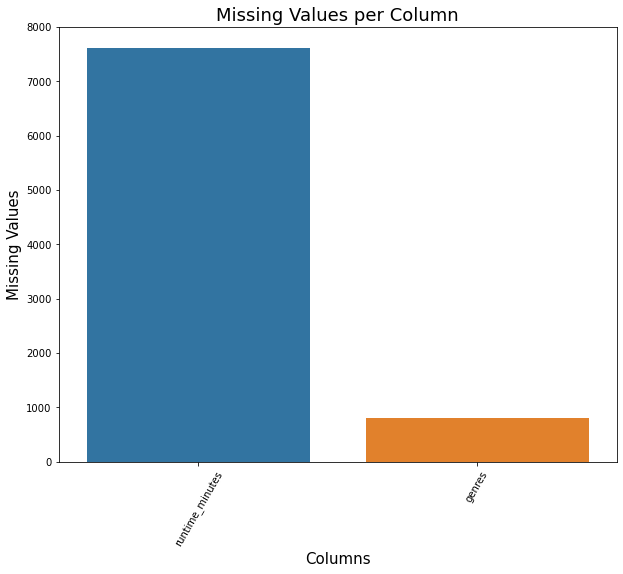

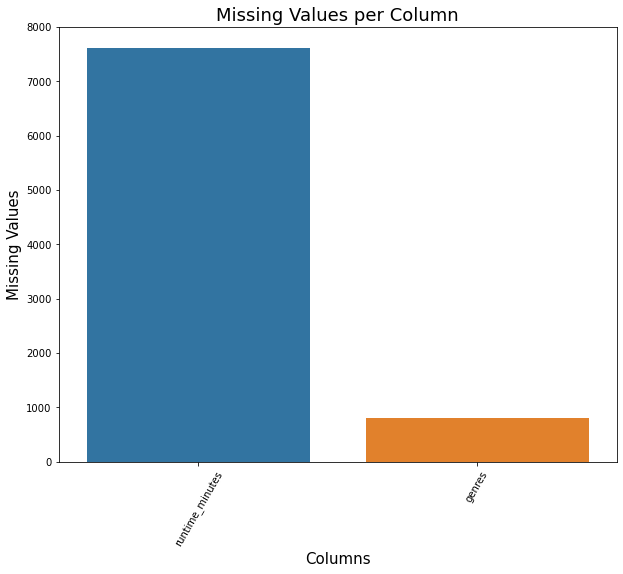

In [65]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)


In [66]:
#checking for duplicates
imdb.duplicated().value_counts()

False    73856
dtype: int64

In [67]:
#checking for descriptive statistics
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.00,66236.00,73856.00,73856.00
mean,2014.28,94.65,6.33,3523.66
std,2.61,208.57,1.47,30294.02
min,2010.00,3.00,1.00,5.00
25%,2012.00,81.00,5.50,14.00
50%,2014.00,91.00,6.50,49.00
75%,2016.00,104.00,7.40,282.00
max,2019.00,51420.00,10.00,1841066.00


In [68]:
#calculating the mean
print(imdb.median())

start_year        2014.00
runtime_minutes     91.00
averagerating        6.50
numvotes            49.00
dtype: float64


In [69]:
#dropping the missing values
imdb = imdb.dropna()
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.00,Drama,8.40,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.00,Documentary,6.20,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136


In [70]:
#confirming there is no more missing data
imdb.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [71]:
#viewing the first five rows 
three_combo.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,2011.00,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,241100000.00,804600000.00,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.58,2011.00,6.40,8571
1,4,2015.00,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,459000000.00,946400000.00,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015.00,7.30,13457
2,7,2018.00,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,678800000.00,1369.50,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018.00,8.30,13948
3,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510
4,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510


In [72]:
#viewing the first five rows
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy",8.10,263


## DATA ANALYSIS AND VISUALISATION

GROSS PROFIT AND GROSS PROFIT MARGIN

- Used the gross profit to determine the company's gain from the movie production
- The profit margin was to show the efficiency of the profits to the company

In [73]:
#calculating the gross profit and gross profit margin

three_combo['gross_profit'] = three_combo['worldwide_gross'] - three_combo['production_budget']
three_combo['gross_profit_margin'] = (three_combo['gross_profit'] / three_combo['worldwide_gross']) * 100
three_combo

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count,gross_profit,gross_profit_margin
0,2,2011.00,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,241100000.00,804600000.00,2011,...,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.58,2011.00,6.40,8571,635063875.00,60.73
1,4,2015.00,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,459000000.00,946400000.00,2015,...,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015.00,7.30,13457,1072413963.00,76.44
2,7,2018.00,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,678800000.00,1369.50,2018,...,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018.00,8.30,13948,1748134200.00,85.35
3,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,...,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510,355945209.00,54.26
4,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,...,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017.00,6.20,7510,355945209.00,54.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,68,2012.00,Sound of My Voice,135000.00,408015.00,429448.00,FoxS,408000.00,18700000.00,2012,...,"[878, 18, 9648, 53]",86812,en,Sound of My Voice,7.21,2011.00,6.40,169,294448.00,68.56
1390,73,2012.00,Your Sister's Sister,120000.00,1597486.00,3090593.00,IFC,1600000.00,18700000.00,2012,...,"[18, 35]",84355,en,Your Sister's Sister,7.12,2012.00,6.60,192,2970593.00,96.12
1391,80,2015.00,The Gallows,100000.00,22764410.00,41656474.00,WB (NL),22800000.00,20200000.00,2015,...,"[27, 53]",299245,en,The Gallows,9.17,2015.00,4.80,591,41556474.00,99.76
1392,86,2017.00,A Ghost Story,100000.00,1594798.00,2769782.00,A24,1600000.00,18700000.00,2017,...,"[18, 14, 10749]",428449,en,A Ghost Story,11.89,2017.00,7.00,906,2669782.00,96.39


- Worldwide Gross Profit and Gross Profit Margin

In [74]:
#viewing only the introduced columns
profits=['gross_profit','gross_profit_margin']
three_combo.loc[:, profits]

,gross_profit,gross_profit_margin
0,635063875.00,60.73
1,1072413963.00,76.44
2,1748134200.00,85.35
3,355945209.00,54.26
4,355945209.00,54.26
...,...,...
1389,294448.00,68.56
1390,2970593.00,96.12
1391,41556474.00,99.76
1392,2669782.00,96.39


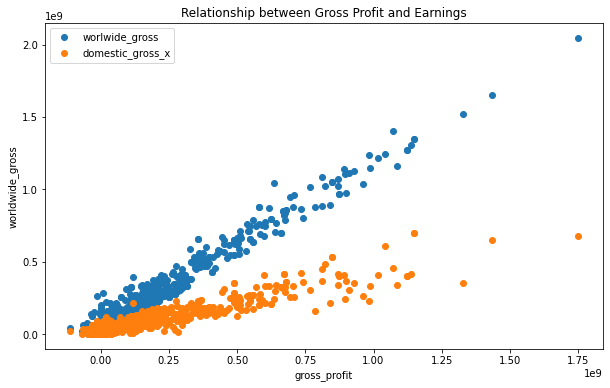

In [75]:
#plotting the relationships
x = three_combo['worldwide_gross']
y = three_combo['domestic_gross_x']
fig,ax = plt.subplots(figsize=(10,6))

#plotting the relationship between gross profit and worldwide gross

plt.scatter(three_combo['gross_profit'],three_combo['worldwide_gross'], label='worlwide_gross')

#plotting the relationship between gross profit and domestic gross

plt.scatter(three_combo['gross_profit'],three_combo['domestic_gross_x'], label='domestic_gross_x')
plt.xlabel('gross_profit')
plt.ylabel('worldwide_gross')
plt.title('Relationship between Gross Profit and Earnings')
ax.legend()
plt.show()

profit gross analysis

   - The worldwide gross is significantly much more than the domestic gross and is it can be seen even for the profit generated after selling worldwide is much greater. 
   - The cost of production doesn't change regardless of where the movie will sell.

Recommendation

   - The movie made should target the global market to maximize on the profit since even when the market was domestic the cost of production remained the same. 

## Return On Investment 

- Return On Investments will help compare the potential profitability of different investment in this case being Movies production.

In [76]:
#calculating the Return On Investment(ROI) 

three_combo['ROI'] = (three_combo['worldwide_gross'] - three_combo['production_budget']) / three_combo['production_budget'] * 100
three_combo.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,...,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count,gross_profit,gross_profit_margin,ROI
0,2,2011.00,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,241100000.00,804600000.00,2011,...,1865,en,Pirates of the Caribbean: On Stranger Tides,30.58,2011.00,6.40,8571,635063875.00,60.73,154.67
1,4,2015.00,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,459000000.00,946400000.00,2015,...,99861,en,Avengers: Age of Ultron,44.38,2015.00,7.30,13457,1072413963.00,76.44,324.38
2,7,2018.00,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,678800000.00,1369.50,2018,...,299536,en,Avengers: Infinity War,80.77,2018.00,8.30,13948,1748134200.00,85.35,582.71
3,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,...,141052,en,Justice League,34.95,2017.00,6.20,7510,355945209.00,54.26,118.65
4,9,2017.00,Justice League,300000000.00,229024295.00,655945209.00,WB,229000000.00,428900000.00,2017,...,141052,en,Justice League,34.95,2017.00,6.20,7510,355945209.00,54.26,118.65


In [77]:
#checking the ROI data
ROI=three_combo['ROI']
three_combo.loc[:, 'ROI']

0        154.67
1        324.38
2        582.71
3        118.65
4        118.65
         ...   
1389     218.11
1390    2475.49
1391   41556.47
1392    2669.78
1393     748.30
Name: ROI, Length: 1394, dtype: float64

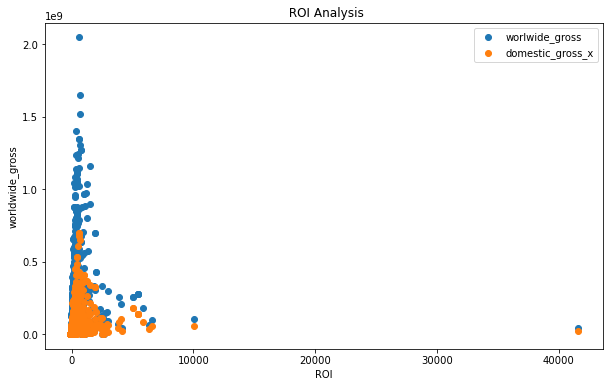

In [78]:
#plotting for the ROI against Worldwide and domestic gross
x = three_combo['worldwide_gross']
y = three_combo['domestic_gross_x']
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(three_combo['ROI'],three_combo['worldwide_gross'], label='worlwide_gross')
plt.scatter(three_combo['ROI'],three_combo['domestic_gross_x'], label='domestic_gross_x')
plt.xlabel('ROI')
plt.ylabel('worldwide_gross')
plt.title(' ROI Analysis')
ax.legend()
plt.show()

ROI Analysis

  - The Return On Investment was not high. 
  - This is by comparing the cost of production of a movie and the gross profit made after selling both domestic and globally. 

Recommendation

   - The studio should maximise on marketing so as to increase the worldwide gross sales; no matter how high the cost of production, the studio will make more Return on Investment.


## GENRE RATINGS

- This will help get the best rated genre to compare with their production budget

In [79]:
#getting the plot range for the genre annd ratings
imdb= imdb[:100]

In [80]:
#grouping the variables to be used
grouped_df = imdb.groupby('genres')['averagerating'].count().sort_values(ascending = False)

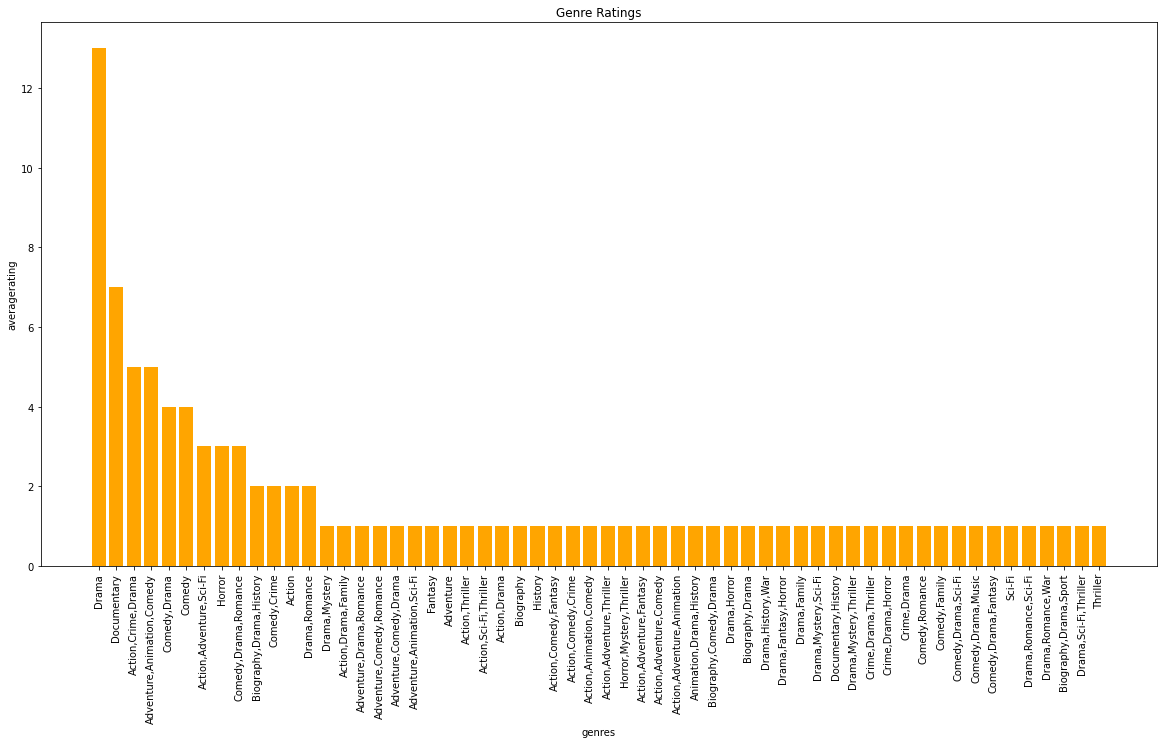

In [83]:
# Plot a bar chart of the Genre and ratings

plt.figure(figsize=(20,10))
plt.bar(grouped_df.index, grouped_df.values, color='Orange')
plt.xticks(rotation=90)
plt.xlabel('genres')
plt.ylabel('averagerating')
plt.title('Genre Ratings')
plt.show();

Genre Ratings

Analysis
 - The highest rated genre is pure drama and this would only mean it the most prefered genre by the views.
 
Recomendation

 - The studio should consider producing a genre that is highly prefered as that will sell easily and will sell more.

### The Best 50 Movies

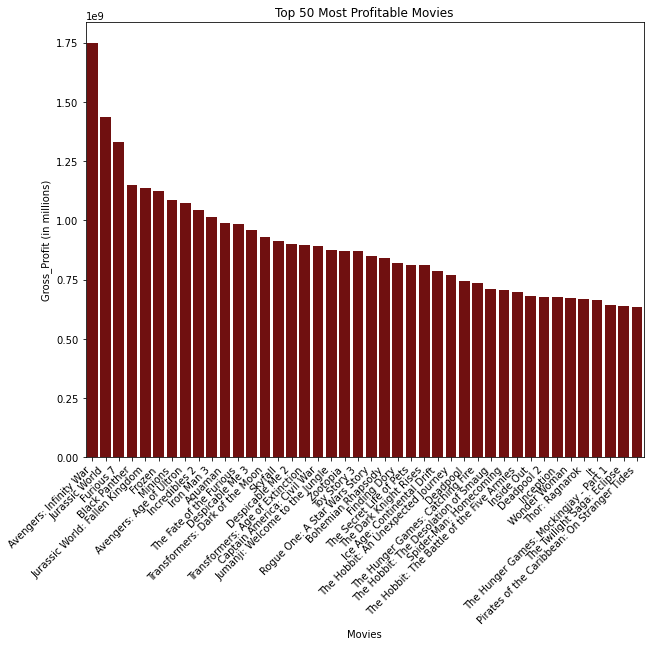

In [82]:
# sort movies_data by profit in descending order
three_combo_sorted = three_combo.sort_values('gross_profit', ascending=False)

# select the top 50 most profitable movies
top_movies = three_combo_sorted.head(50)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['movie'], y=top_movies['gross_profit'], color='Maroon')

# set chart title and axis labels
ax.set_title('Top 50 Most Profitable Movies')
ax.set_xlabel('Movies')
ax.set_ylabel('Gross_Profit (in millions)')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# show the plot
plt.show()


Analysis

 - Avengers: Infinity war was the most profitable movie. Its cost of production was equally high and after the sales the profit matgin was high as well. The cost of production being high couold have been led by producers trying to produce the best quality they could which ended up making high profits.
 
Recomendations

 - The Micrsoft studio can capitalize on making a good quality movie as it may lead to sales and hence better profit margins.


## SUMMARY

With the data provided it is possible to know the viewers preferences by analysing the viewers ratings. The data also helps analyse the profits and losses made by the movie thereby we are able to tell whether it worth venturing into the movie production. By the end of the analysis we have been able to tell which is the best movie genre to start with and what was the profits made by the best selling movie. 
It is a field worth the trial. 